In [133]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [134]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [135]:
# t=np.random.uniform(0,1,size=50,requires_grad=False)
t = [0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551, 0.20408163265306123, 0.22448979591836735, 0.24489795918367346, 0.2653061224489796, 0.2857142857142857, 0.30612244897959184, 0.32653061224489793, 0.3469387755102041, 0.3673469387755102, 0.3877551020408163, 0.40816326530612246, 0.42857142857142855, 0.4489795918367347, 0.46938775510204084, 0.4897959183673469, 0.5102040816326531, 0.5306122448979592, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591837, 0.6326530612244898, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857143, 0.7346938775510204, 0.7551020408163265, 0.7755102040816326, 0.7959183673469388, 0.8163265306122449, 0.8367346938775511, 0.8571428571428571, 0.8775510204081632, 0.8979591836734694, 0.9183673469387755, 0.9387755102040817, 0.9591836734693877, 0.9795918367346939, 1.0]


In [136]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=theta)
    return qml.probs(wires=[0])

In [137]:
def encoder(x):
    vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [138]:
def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    rescale_coef = 30
    return (f_val[1]*(norm_x**2))*rescale_coef+w
    # print(qml.draw(hepler)(encoded_x))

In [139]:
# f(-1.7)

In [140]:
def f_test(t):
    return 8+10*t

In [141]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:1], params[1:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for x in t:
        loss += (f(x,theta[0],w)-f_test(x))**2/len(t)
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [142]:
import numpy as np
from scipy.optimize import minimize



theta = np.random.uniform(0, 2 * np.pi, size=(1))
w = np.zeros(1)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:1], result.x[1:]
theta = theta_flat.reshape(theta.shape)

Current loss: [135.25071228]
Current loss: [73.00807622]
Current loss: [34.86757496]
Current loss: [32.62552872]
Current loss: [28.52817659]
Current loss: [21.40649681]
Current loss: [10.9785117]
Current loss: [4.98599894]
Current loss: [4.46587812]
Current loss: [4.4477268]
Current loss: [4.44764463]
Current loss: [4.44764224]


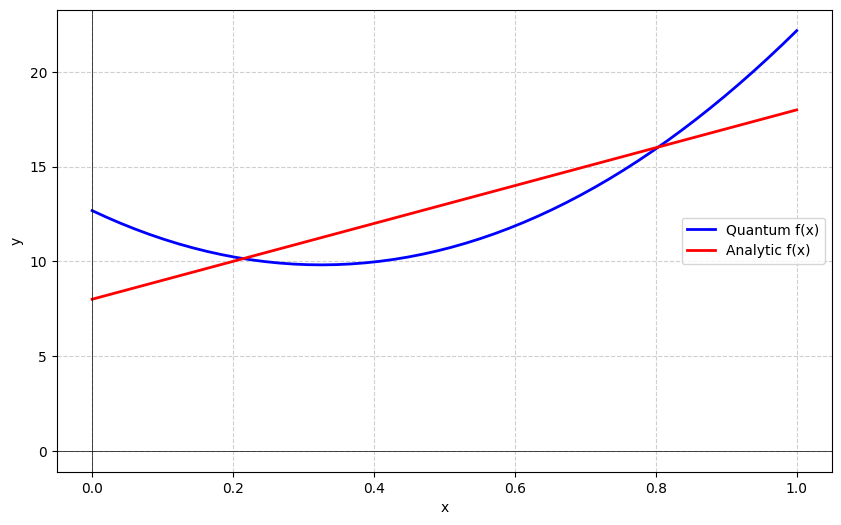

In [143]:


# Calculate corresponding y values for both functions
y1 = [f(x,theta[0],w) for x in t]
y2 = [f_test(x) for x in t]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
